C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2498 (\N{BENGALI VOWEL SIGN UU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2459 (\N{BENGALI LETTER CHA})

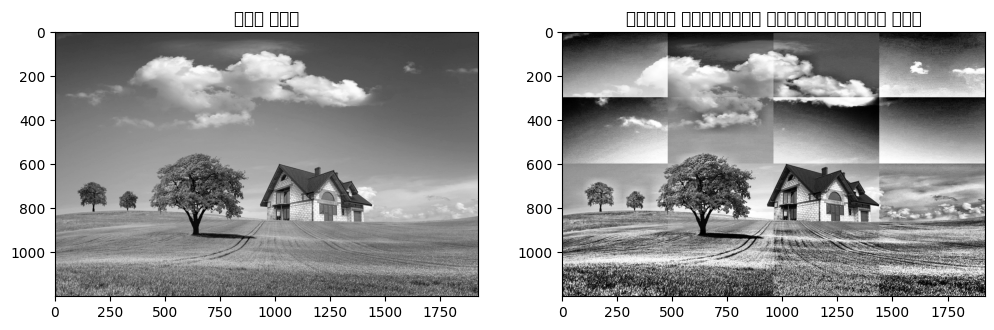

প্রক্রিয়া সম্পন্ন ✅, ফাইল সংরক্ষিত হয়েছে: processed_grid_image.png


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# গ্রেস্কেল ইমেজ লোড করা
img = cv2.imread('nature3.png', 0)
if img is None:
    raise Exception("Image not found!")

# গ্রিডের সংখ্যা নির্ধারণ (যেমন 4x4)
s = 4
h, w = img.shape
grid_h, grid_w = h // s, w // s

# আউটপুট ইমেজ তৈরি
output = np.zeros_like(img)

# CLAHE অবজেক্ট (দুটি ভিন্ন clip limit সহ)
clahe_low = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_high = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))

# প্রতিটি গ্রিডে ভিন্ন ভিন্ন অপারেশন প্রয়োগ
for i in range(s):
    for j in range(s):
        y1, y2 = i * grid_h, (i + 1) * grid_h
        x1, x2 = j * grid_w, (j + 1) * grid_w
        grid = img[y1:y2, x1:x2]

        # আলাদা আলাদা operation
        if (i + j) % 3 == 0:
            processed = cv2.equalizeHist(grid)   # Histogram Equalization
        elif (i + j) % 3 == 1:
            processed = cv2.equalizeHist(grid)   # AHE এর মতো প্রভাব
            processed = cv2.resize(processed, (grid.shape[1], grid.shape[0]), interpolation=cv2.INTER_LINEAR)
        else:
            # CLAHE alternately
            if (i + j) % 2 == 0:
                processed = clahe_low.apply(grid)
            else:
                processed = clahe_high.apply(grid)

        output[y1:y2, x1:x2] = processed

# মূল ও পরিবর্তিত ইমেজ একসাথে দেখানো
combined = np.hstack((img, output))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("মূল ছবি")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("গ্রিড অনুযায়ী প্রক্রিয়াকৃত ছবি")
plt.imshow(output, cmap='gray')
plt.show()

cv2.imwrite('processed_grid_image.png', combined)
print("প্রক্রিয়া সম্পন্ন ✅, ফাইল সংরক্ষিত হয়েছে: processed_grid_image.png")


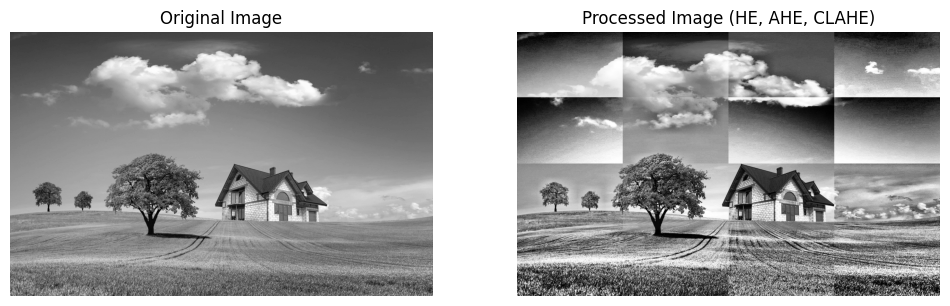

✅ Processing complete! Output saved as 'processed_grid_image.png'


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image (grayscale)
img = cv2.imread('nature3.png', 0)
if img is None:
    raise Exception("Image not found!")

# Step 2: Define how many grids (s x s)
s = 4  # for example: 4x4 = 16 regions
h, w = img.shape
grid_h, grid_w = h // s, w // s  # height and width of each small grid

# Step 3: Prepare an empty image to store processed grids
output = np.zeros_like(img)

# Step 4: Create CLAHE objects with different clip limits
clahe_low = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_high = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))

# Step 5: Process each grid separately
for i in range(s):
    for j in range(s):
        # Define the grid boundaries
        y1, y2 = i * grid_h, (i + 1) * grid_h
        x1, x2 = j * grid_w, (j + 1) * grid_w
        grid = img[y1:y2, x1:x2]

        # Apply different operations in different grids
        if (i + j) % 3 == 0:
            # (1) Histogram Equalization (HE)
            processed = cv2.equalizeHist(grid)

        elif (i + j) % 3 == 1:
            # (2) Adaptive Histogram Equalization (AHE) simulation
            processed = cv2.equalizeHist(grid)
            # Use bilinear interpolation to make transitions smooth
            processed = cv2.resize(processed, (grid.shape[1], grid.shape[0]),
                                   interpolation=cv2.INTER_LINEAR)

        else:
            # (3) Contrast-Limited Adaptive Histogram Equalization (CLAHE)
            if (i + j) % 2 == 0:
                processed = clahe_low.apply(grid)  # CLAHE with low clip limit
            else:
                processed = clahe_high.apply(grid)  # CLAHE with high clip limit

        # Place processed part into output image
        output[y1:y2, x1:x2] = processed

# Step 6: Combine original and processed images for comparison
combined = np.hstack((img, output))

# Step 7: Display results using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Processed Image (HE, AHE, CLAHE)")
plt.imshow(output, cmap='gray')
plt.axis('off')

plt.show()

# Step 8: Save the combined result
cv2.imwrite('processed_grid_image.png', combined)
print("✅ Processing complete! Output saved as 'processed_grid_image.png'")
